# Lab-5


# Correlation Analysis

* Name: Devi Sri Swetha Tanuku
* Student ID: N01623362

## Import Libraries

In [5]:
import numpy as np
import pandas as pd

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Titanic dataset

In [10]:
titanic = pd.read_csv("Titanic.csv")

## Read head of the dataset

In [13]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exercise 1

<Axes: xlabel='Fare', ylabel='Count'>

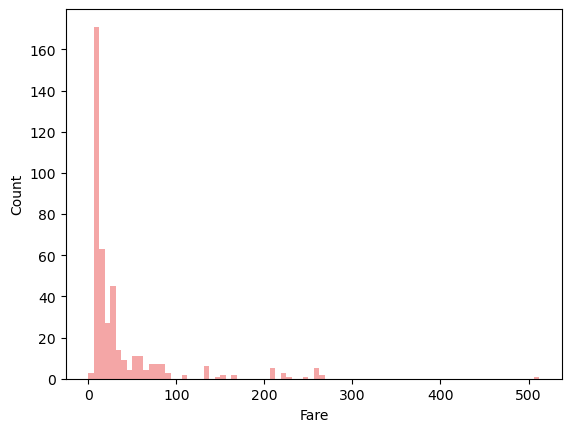

In [20]:
# CODE HERE
sns.histplot(titanic["Fare"], color = "lightcoral", alpha = 0.7, edgecolor = None)

## Exercise 2

In [73]:
# CODE HERE
titanic_new = titanic.drop(columns = ["Name","Sex", "Ticket", "Cabin", "Embarked"])
titanic_new

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500
414,1306,1,39.0,0,0,108.9000
415,1307,3,38.5,0,0,7.2500
416,1308,3,NaN,0,0,8.0500


In [75]:
titanic_new.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000


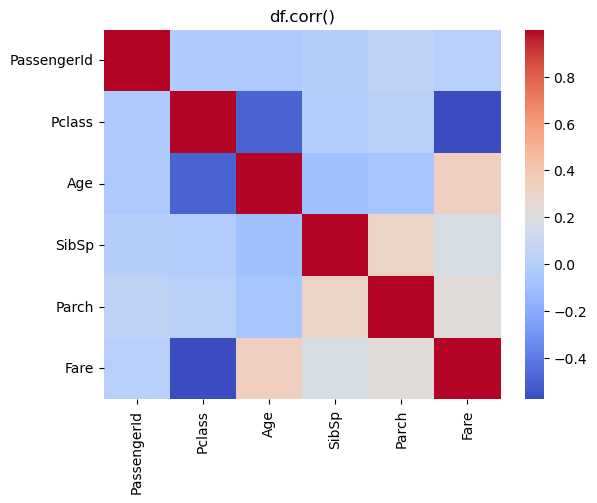

In [77]:
levels =  np.arange(-0.4, 1.0, 0.2)
sns.heatmap(titanic_new.corr(), cmap = "coolwarm", cbar_kws = {"ticks": levels})
plt.xticks(rotation = 90)
plt.title("df.corr()")
plt.show()

## Exercise 3


Find "Pearson correlation" and "Spearman correlation" between "Age" and "Parch" column?

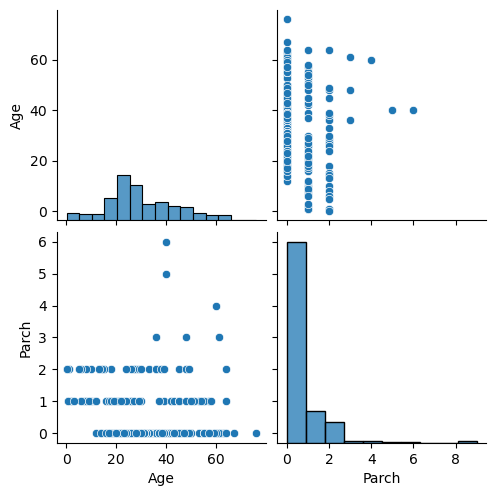

In [81]:
# CODE HERE
T = titanic[['Age', 'Parch']]
sns.pairplot(T)

In [82]:
import scipy
from scipy.stats import pearsonr, spearmanr

In [85]:
age = titanic['Age']
parch = titanic['Parch']
age_parch_cleaned = pd.concat([age, parch], axis=1).dropna()

age_new = age_parch_cleaned['Age']
parch_new = age_parch_cleaned['Parch']
pearsonr_coefficient, p_value = pearsonr(age_new, parch_new)
print('PeasonR Correlation Coefficient %0.3f'% (pearsonr_coefficient))

PeasonR Correlation Coefficient -0.061


In [87]:
spearmanr_coefficient, p_value = spearmanr(age_new, parch_new)
print('PeasonR Correlation Coefficient %0.3f'% (spearmanr_coefficient))

PeasonR Correlation Coefficient -0.130


## Exercise 4

Calculate the standard deviation,  variance and mean of column "Fare" and "Age"

In [91]:
# CODE HERE

In [93]:
fare_mean = titanic['Fare'].mean()
fare_variance = titanic['Fare'].var()
fare_std_dev = titanic['Fare'].std()

age_mean = titanic['Age'].mean()
age_variance = titanic['Age'].var()
age_std_dev = titanic['Age'].std()

print(f"Fare - Mean: {fare_mean:.2f}, Variance: {fare_variance:.2f}, Standard Deviation: {fare_std_dev:.2f}")
print(f"Age - Mean: {age_mean:.2f}, Variance: {age_variance:.2f}, Standard Deviation: {age_std_dev:.2f}")

Fare - Mean: 35.63, Variance: 3125.66, Standard Deviation: 55.91
Age - Mean: 30.27, Variance: 201.11, Standard Deviation: 14.18
